### Importing Libraries

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [729]:
import warnings
warnings.filterwarnings('ignore')

### Exploring dataset

In [421]:
data = pd.read_csv('dataset.csv')
data.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


### (Preprocessing) Data Cleaning - removing missing value tuples

In [422]:
# before cleaning
data_size = data.shape
missing_values = data.isnull().sum()
data_size, missing_values

((2546, 5),
 name        0
 ratings     0
 price       0
 imgURL      0
 corpus     12
 dtype: int64)

In [423]:
data = data.dropna()

# after cleaning
data_size = data.shape
missing_values = data.isnull().sum()
data_size, missing_values

((2534, 5),
 name       0
 ratings    0
 price      0
 imgURL     0
 corpus     0
 dtype: int64)

### (Preprocessing) Data Cleaning - removing rupee symbol from price

In [424]:
def clean_price(price):
    price2 = re.sub(r'\D', '', str(price))
    try:
        return int(price2)
    except ValueError:
        return None

data['price'] = data['price'].apply(clean_price)

data.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


### Feature Extraction - Operating System

In [425]:
# to extract operating system name from corpus
def extract_os(corpus):
    os = re.search(r'System(.*?)Processor', corpus)
    if os:
        return os.group(1).strip()
    else:
        os = re.search(r'System(.*?)Frequency', corpus)
    if os:
        return os.group(1).strip()
    else:
        os = re.search(r'System(.*?)Primary', corpus)
    if os:
        return os.group(1).strip()
    else:
        os = re.search(r'System(.*?)Oxygen', corpus)
    if os:
        return os.group(1).strip()
    return None

data_os = data.copy()

data_os['OS'] = data_os['corpus'].apply(extract_os)

data_os.head()

,name,ratings,price,imgURL,corpus,OS
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,Android 12
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,Android Pie 9.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,Android 11
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,Android Q 11
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,iOS 15


### Categorization of operating systems

In [426]:
# to normalize operating system names
def normalize_os(os):
    if pd.isnull(os):
        return None
    if 'android' in os.lower():
        return 'Android'
    if 'ios' in os.lower():
        return 'iOS'
    if 'tizen' in os.lower():
        return 'Tizen'
    if 'series 30' in os.lower():
        return 'Series 30'
    return 'Other'


data_os['OS'] = data_os['OS'].apply(normalize_os)

data_os.head()



,name,ratings,price,imgURL,corpus,OS
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,Android
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,Android
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,Android
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,Android
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,iOS


In [427]:
#frequency check of different os
import collections

frequency = collections.Counter(data_os['OS'].to_numpy())

print(dict(frequency))
print(len(data_os))

{'Android': 2136, 'iOS': 375, None: 7, 'Other': 11, 'Series 30': 4, 'Tizen': 1}
2534


In [428]:
# removing None records
data_os = data_os.dropna()

data_size = data_os.shape
missing_values = data_os.isnull().sum()
data_size, missing_values

((2527, 6),
 name       0
 ratings    0
 price      0
 imgURL     0
 corpus     0
 OS         0
 dtype: int64)

### Data Visualization of operating system

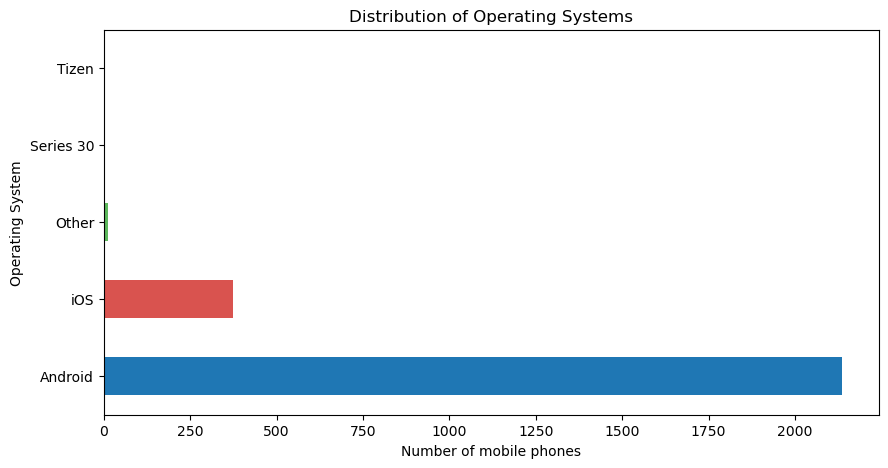

In [429]:
# operating system visualization
data_os['OS'].value_counts().plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Distribution of Operating Systems')
plt.xlabel('Number of mobile phones')
plt.ylabel('Operating System')
plt.show()

### Feature Extraction - Brand Name

In [430]:
# to extract brand name from corpus
def extract_brand(name):
    return name.split()[0]

data_brand = data_os.copy()
data_brand['Brand'] = data_brand['name'].apply(extract_brand)

data_brand.head()

,name,ratings,price,imgURL,corpus,OS,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,Android,REDMI
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,Android,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,Android,REDMI
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,Android,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,iOS,APPLE


In [431]:
frequency = collections.Counter(data_brand['Brand'].to_numpy())

print(dict(frequency))
print(len(data_brand))

{'REDMI': 187, 'OPPO': 246, 'OnePlus': 169, 'APPLE': 349, 'Infinix': 149, 'SAMSUNG': 460, 'vivo': 274, 'Moto': 13, 'realme': 186, 'Xiaomi': 40, 'Mi': 47, 'Redmi': 145, 'MOTOROLA': 82, 'Tecno': 139, '10T': 1, 'Apple': 26, 'Motorola': 1, 'MI3': 1, '13': 2, 'Peace': 2, '11': 1, 'MI': 1, 'Note': 1, '10A': 1, 'GREENBERRI': 1, 'A70': 1, 'A10E': 1, 'MI4': 1}
2527


### Categorization of Brand name

In [432]:
# to categorize brand names
def normalize_brand(brand):
    if pd.isnull(brand):
        return None
    if 'xiaomi' in brand.lower():
        return 'Xiaomi'
    if 'redmi' in brand.lower():
        return 'Xiaomi'
    if 'mi' in brand.lower():
        return 'Xiaomi'
    if 'oppo' in brand.lower():
        return 'OPPO'
    if 'oneplus' in brand.lower():
        return 'OnePlus'
    if 'apple' in brand.lower():
        return 'Apple'
    if 'samsung' in brand.lower():
        return 'Samsung'
    if 'vivo' in brand.lower():
        return 'Vivo'
    if 'moto' in brand.lower():
        return 'Motorola'
    if 'motorola' in brand.lower():
        return 'Motorola'
    if 'infinix' in brand.lower():
        return 'Infinix'
    if 'realme' in brand.lower():
        return 'Realme'
    if 'tecno' in brand.lower():
        return 'Tecno'
    return 'Other'

# data2 = data.copy()
data_brand['Brand'] = data_brand['Brand'].apply(normalize_brand)

data_brand.head()

,name,ratings,price,imgURL,corpus,OS,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,Android,Xiaomi
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,Android,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,Android,Xiaomi
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,Android,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,iOS,Apple


In [433]:
frequency = collections.Counter(data_brand['Brand'].to_numpy())

print(dict(frequency))
print(len(data_brand))

{'Xiaomi': 422, 'OPPO': 246, 'OnePlus': 169, 'Apple': 375, 'Infinix': 149, 'Samsung': 460, 'Vivo': 274, 'Motorola': 96, 'Realme': 186, 'Tecno': 139, 'Other': 11}
2527


In [434]:
# checking blank records
data_size = data_brand.shape
missing_values = data_brand.isnull().sum()
data_size, missing_values

((2527, 7),
 name       0
 ratings    0
 price      0
 imgURL     0
 corpus     0
 OS         0
 Brand      0
 dtype: int64)

### Data Visualization of Brands

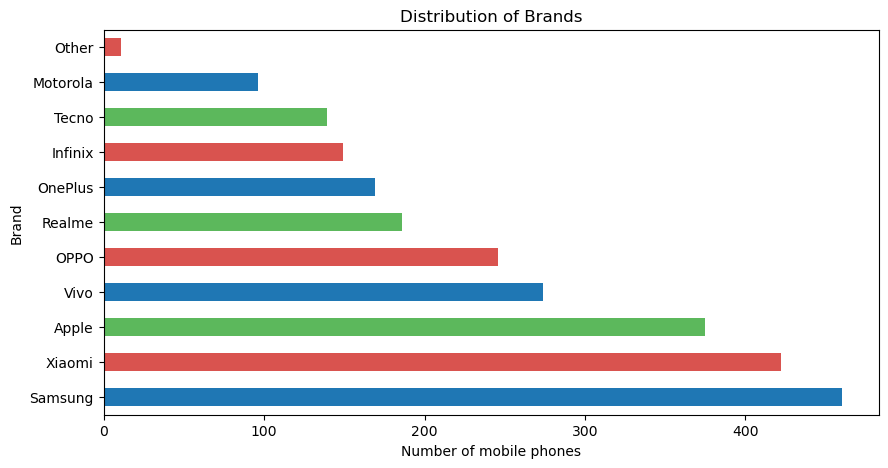

In [435]:
# Brand names visualization
data_brand['Brand'].value_counts().plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Distribution of Brands')
plt.xlabel('Number of mobile phones')
plt.ylabel('Brand')
plt.show()

### Feature Extraction - Storage

In [436]:
# to extract storage information from corpus
def extract_storage(corpus):
    storage = re.search(r'Storage(\d+)', corpus)
    if storage:
        return int(storage.group(1))
    return None

data_storage = data_brand.copy()
data_storage['Storage'] = data_storage['corpus'].apply(extract_storage)

data_storage.head()

,name,ratings,price,imgURL,corpus,OS,Brand,Storage
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,Android,Xiaomi,128.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,Android,OPPO,128.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,Android,Xiaomi,64.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,Android,OnePlus,256.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,iOS,Apple,128.0


In [437]:
frequency = collections.Counter(data_storage['Storage'].to_numpy())

print(dict(frequency))
print(len(data_storage))

{128.0: 1017, 64.0: 651, 256.0: 398, 16.0: 69, 32.0: 271, 512.0: 61, 1024.0: 14, nan: 1, 8.0: 18, nan: 1, 2.0: 8, 153.0: 1, 6.0: 6, 100.0: 2, 4.0: 3, nan: 1, nan: 1, nan: 1, 1.0: 3}
2527


In [438]:
# removing blank values
data_storage = data_storage.dropna()

# checking blank records
data_size = data_storage.shape
missing_values = data_storage.isnull().sum()
data_size, missing_values

((2522, 8),
 name       0
 ratings    0
 price      0
 imgURL     0
 corpus     0
 OS         0
 Brand      0
 Storage    0
 dtype: int64)

In [439]:
frequency = collections.Counter(data_storage['Storage'].to_numpy())

print(dict(frequency))
print(len(data_storage))

{128.0: 1017, 64.0: 651, 256.0: 398, 16.0: 69, 32.0: 271, 512.0: 61, 1024.0: 14, 8.0: 18, 2.0: 8, 153.0: 1, 6.0: 6, 100.0: 2, 4.0: 3, 1.0: 3}
2522


### Data Cleaning - dropping mismatched records

In [440]:
# dropping mismatched storage records in name and corpus
j=0
for i in range(len(data_storage)):
    name2 = data_storage['name'].to_numpy()[i-j]
    pattern = r'\d+'
    matches = re.findall(pattern, name2)

    if(len(matches)==0):
        name_storage = int(data_storage['Storage'].to_numpy()[i-j])
    elif(len(matches)==1):
        name_storage = data_storage['Storage'].to_numpy()[i-j]
    else:
        name_storage = matches[len(matches)-1]
    if(str(int(name_storage))!=str(int(data_storage['Storage'].to_numpy()[i-j])) and data_storage['Brand'].to_numpy()[i-j]!='Apple'):
        data_storage = data_storage.drop([data_storage.index[i-j]])
        j=j+1


    


In [441]:
k=0
print("Total records = ", len(data_storage))
for i in range(len(data_storage)):
    name2 = data_storage['name'].to_numpy()[i]
    pattern = r'\d+'
    matches = re.findall(pattern, name2)

    if(len(matches)==0):
        name_storage = int(data_storage['Storage'].to_numpy()[i])
    elif(len(matches)==1):
        name_storage = data_storage['Storage'].to_numpy()[i]
    else:
        name_storage = matches[len(matches)-1]
    if(str(int(name_storage))!=str(int(data_storage['Storage'].to_numpy()[i])) and data_storage['Brand'].to_numpy()[i]!='Apple'):
#         print(type(name_storage), type(str(int(data_storage['Storage'].to_numpy()[i]))), end=" ")
        print(i, data_storage['name'].to_numpy()[i], data_storage['Storage'].to_numpy()[i], name_storage)
        k=k+1
        
data_storage = data_storage.drop(data_storage[data_storage['Storage'].to_numpy()==153].index)
data_storage = data_storage.drop(data_storage[data_storage['Storage'].to_numpy()==100].index)
data_storage = data_storage.drop(data_storage[data_storage['Storage'].to_numpy()==2].index)
print("mismatched records count = ", k)


Total records =  2500
mismatched records count =  0


### Feature Scaling - changing 1TB to 1024GB

In [442]:
# fixing some records by swapping ram and storage or by scaling
data_storage.loc[data_storage['Storage'] == 1, 'Storage'] = 1024 # scaling
data_storage.loc[data_storage['Storage'] == 6, 'Storage'] = 128 # fixing 6GB-RAM to 128GB



In [443]:
frequency = collections.Counter(data_storage['Storage'].to_numpy())

print(dict(frequency))
print(len(data_storage))

{128.0: 1020, 64.0: 644, 256.0: 397, 16.0: 67, 32.0: 265, 512.0: 61, 1024.0: 17, 8.0: 17, 4.0: 3}
2491


### Storage Visualization

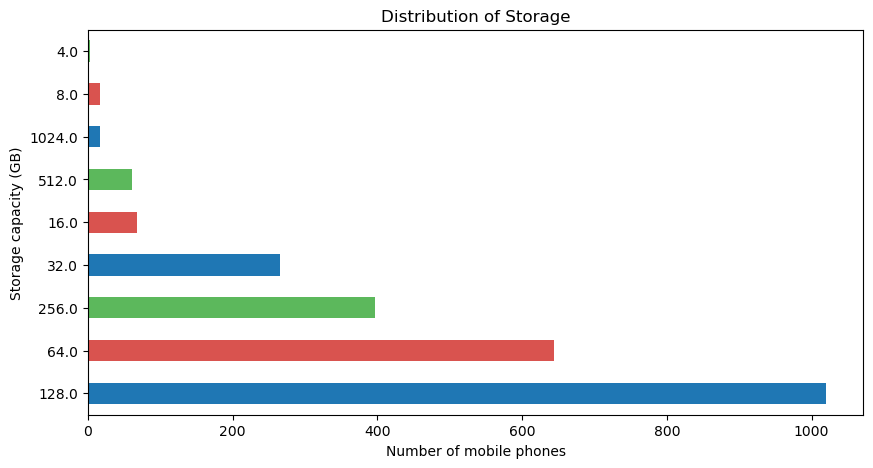

In [444]:
# Storage visualization
data_storage['Storage'].value_counts().plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Distribution of Storage')
plt.xlabel('Number of mobile phones')
plt.ylabel('Storage capacity (GB)')
plt.show()

### Feature Extraction - RAM

In [445]:
# to extract ram information from corpus
def extract_ram(corpus):
    ram = re.search(r'RAM(\d+)', corpus)
    if ram:
        return int(ram.group(1))
    return None

data_ram = data_storage.copy()
data_ram['RAM'] = data_ram['corpus'].apply(extract_ram)

data_ram.head()

,name,ratings,price,imgURL,corpus,OS,Brand,Storage,RAM
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,Android,Xiaomi,128.0,6.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,Android,OPPO,128.0,6.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,Android,Xiaomi,64.0,4.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,Android,OnePlus,256.0,12.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,iOS,Apple,128.0,NaN


In [446]:
frequency = collections.Counter(data_ram['RAM'].to_numpy())

print(dict(frequency))
print(len(data_ram))

{6.0: 422, 4.0: 563, 12.0: 134, nan: 1, nan: 1, 8.0: 606, 2.0: 144, 3.0: 202, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 1.0: 13, nan: 1, 16.0: 8, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 128.0: 9, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1

In [414]:
# dropping redundant records
data_ram = data_ram.drop(data_ram[data_ram['RAM'].to_numpy()==32].index)
data_ram = data_ram.drop(data_ram[data_ram['RAM'].to_numpy()==64].index)

In [447]:
# fixing RAM values by taking it from name feature
def fix_ram(name):
    pattern = r'\d+'
    matches = re.findall(pattern, name)
    return matches[len(matches)-1]

for i in range(len(data_ram)):
    if (data_ram['RAM'].to_numpy()[i]==128):
        new_ram = fix_ram(data_ram['name'].to_numpy()[i])
        data_ram.loc[data_ram.index[i], ['RAM']] = int(new_ram)


In [418]:
for i in range(len(data_ram)):
    if (data_ram['RAM'].to_numpy()[i]==16 or data_ram['RAM'].to_numpy()[i]==12 or data_ram['RAM'].to_numpy()[i]==8 or data_ram['RAM'].to_numpy()[i]==1 or data_ram['RAM'].to_numpy()[i]==2 or data_ram['RAM'].to_numpy()[i]==3 or data_ram['RAM'].to_numpy()[i]==4 or data_ram['RAM'].to_numpy()[i]==6):
        pass
    elif(data_ram['Brand'].to_numpy()[i]!='Apple'):
        print(data_ram['name'][data_ram.index[i]], '\t\t\t',data_ram['RAM'][data_ram.index[i]])
    else:
        pass

for i in range(len(data_ram)):
    if (data_ram['RAM'].to_numpy()[i]==16 or data_ram['RAM'].to_numpy()[i]==12 or data_ram['RAM'].to_numpy()[i]==8 or data_ram['RAM'].to_numpy()[i]==1 or data_ram['RAM'].to_numpy()[i]==2 or data_ram['RAM'].to_numpy()[i]==3 or data_ram['RAM'].to_numpy()[i]==4 or data_ram['RAM'].to_numpy()[i]==6):
        pass
    elif(data_ram['Brand'].to_numpy()[i]!='Apple'):
        pass
    else:
        print(data_ram['name'][data_ram.index[i]], '\t\t\t',data_ram['RAM'][data_ram.index[i]])

OPPO Reno10 5G (Ice Blue, 256 GB) 			 nan
SAMSUNG Guru Music 2 			 nan
OPPO Reno10 5G (Silvery Grey, 256 GB) 			 nan
Infinix Smart 7 HD (Green Apple, 64 GB) 			 nan
OPPO Reno10 5G (Ice Blue, 256 GB) 			 nan
OPPO Reno10 5G (Silvery Grey, 256 GB) 			 nan
SAMSUNG Guru FM Plus 			 nan
OPPO Reno10 5G (Ice Blue, 256 GB) 			 nan
OPPO Reno10 5G (Ice Blue, 256 GB) 			 nan
OPPO Reno10 5G (Ice Blue, 256 GB) 			 nan
OPPO Reno10 5G (Ice Blue, 256 GB) 			 nan
SAMSUNG Guru Music 2 			 nan
APPLE iPhone 13 mini (Blue, 128 GB) 			 nan
APPLE iPhone 6s Plus (Gold, 64 GB) 			 nan
APPLE iPhone 14 Plus ((PRODUCT)RED, 256 GB) 			 nan
APPLE iPhone XR ((PRODUCT)RED, 64 GB) 			 nan
APPLE iPhone 14 Pro (Gold, 256 GB) 			 nan
APPLE iPhone 14 Plus (Midnight, 256 GB) 			 nan
APPLE iPhone 6s (Silver, 64 GB) 			 nan
APPLE iPhone 14 Pro Max (Gold, 512 GB) 			 nan
APPLE iPhone 13 Pro Max (Sierra Blue, 1 TB) 			 nan
APPLE iPhone 14 Pro (Gold, 128 GB) 			 nan
APPLE iPhone 12 (Blue, 128 GB) 			 nan
APPLE iPhone SE (Red, 12

APPLE iPhone 12 Pro Max (Gold, 128 GB) 			 nan
APPLE iPhone 7 (Red, 128 GB) 			 nan
APPLE iPhone 13 (Pink, 512 GB) 			 nan
APPLE iPhone XS Max (Space Grey, 256 GB) 			 nan
APPLE iPhone 14 Plus ((PRODUCT)RED, 256 GB) 			 nan
APPLE iPhone 6s (Rose Gold, 64 GB) 			 nan
APPLE iPhone 11 (Yellow, 64 GB) 			 nan
APPLE iPhone 7 Plus (Jet Black, 256 GB) 			 nan
APPLE iPhone 11 Pro Max (Space Grey, 256 GB) 			 nan
APPLE iPhone 11 (Purple, 64 GB) 			 nan
APPLE iPhone SE (Red, 256 GB) 			 nan
APPLE iPhone 14 Plus (Starlight, 128 GB) 			 nan
Apple iPhone XR ((PRODUCT)RED, 64 GB) (Includes EarPods, Power Adapter) 			 nan
APPLE iPhone 12 Pro (Pacific Blue, 512 GB) 			 nan
APPLE iPhone 13 (Pink, 256 GB) 			 nan
APPLE iPhone 13 Pro (Graphite, 128 GB) 			 nan
APPLE iPhone 8 (Space Grey, 256 GB) 			 nan


In [448]:

data_ram.head(10)


,name,ratings,price,imgURL,corpus,OS,Brand,Storage,RAM
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,Android,Xiaomi,128.0,6.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,Android,OPPO,128.0,6.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,Android,Xiaomi,64.0,4.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,Android,OnePlus,256.0,12.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,iOS,Apple,128.0,NaN
5,"APPLE iPhone 6s Plus (Gold, 64 GB)",4.5,5537,https://rukminim2.flixcart.com/image/312/312/m...,Storage64 SystemiOS 9Processor TypeA9 Chip 12...,iOS,Apple,64.0,NaN
6,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,18996,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 13Processor S...,Android,Xiaomi,128.0,8.0
7,"Infinix Hot 11 (Emerald Green, 64 GB)",4.3,9999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage256GB Sy...,Android,Infinix,64.0,4.0
8,"Infinix Note 10 Pro (Nordic Secret, 256 GB)",4.2,16999,https://rukminim2.flixcart.com/image/312/312/k...,Storage256 GBRAM8 GBExpandable Storage256GB S...,Android,Infinix,256.0,8.0
9,"SAMSUNG Galaxy A04 (Green, 128 GB)",4.0,12999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM4 GBTotal Memory128GB SystemA...,Android,Samsung,128.0,4.0


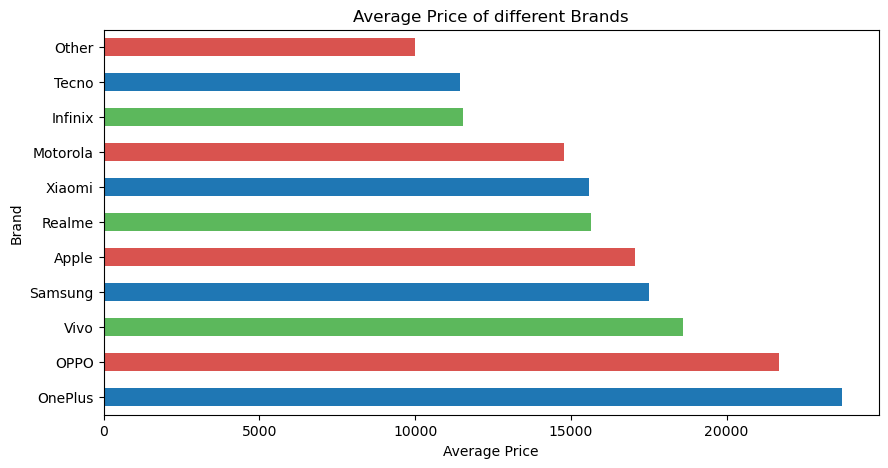

In [449]:
# Brand vs price visualization
avg = data_ram.groupby('Brand')['price'].mean()
avg = avg.sort_values(ascending=False)
avg.plot(kind = 'barh', rot=0, figsize=(10, 5), color=['#1f77b4', '#d9534f', '#5cb85c'])
plt.title('Average Price of different Brands')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()

### Data Mining

In [829]:
data_final = data_ram

# function to find the list of all suitable mobile phones
def find_mobiles(brand, storage, min_price, max_price):
    filtered_list = data_final[(data_final['Brand'] == brand) & (data_final['Storage'] == storage) & 
    (data_final['price'] >= min_price) & (data_final['price'] <= max_price)]
    return filtered_list.sort_values(by='ratings', ascending=False).head(10)

# function to generate the list of all recommendations for mobile phones
def recommend_mobiles(brand, storage, min_price, max_price):
    filtered_list = data_final[(data_final['Brand'] == brand) & (data_final['Storage'] == storage) & 
    (data_final['price'] >= min_price) & (data_final['price'] <= max_price)]
    return filtered_list.sort_values(by='ratings', ascending=False)


In [730]:
from ipywidgets import interact
from IPython.display import clear_output
def update_list():
    global list
    list = find_mobiles(brand=brand2, storage=storage2,  min_price=min_p, max_price=max_p)
    

brand2=""
ram2=""
storage2=""
min_p=0
max_p=0

def func_brand(Brand):
    global brand2
    brand2=Brand
    update_list()
    
def func_storage(Storage):
    global storage2
    storage2=Storage
    update_list()


def func_min_price(min_price):
    global min_p
    min_p=min_price
    update_list()

def func_max_price(max_price):
    global max_p
    max_p=max_price
    update_list()

a  = interact(func_brand, Brand=['Apple', 'Samsung', 'Xiaomi', 'Motorola', 'Vivo', 'OPPO', 'Realme', 'Infinix', 'OnePlus', 'Tecno'])
e  = interact(func_storage, Storage=[64.0, 128.0, 256.0, 32.0, 16.0, 8.0, 512.0, 1024.0])
c = interact(func_min_price, min_price=(2000,10000));
d = interact(func_max_price, max_price=(10000,100000));
update_list()

import ipywidgets as widgets


button = widgets.Button(description="Search")
output = widgets.Output()

display(button, output)

@output.capture()
def on_button_clicked(b):
    global list
    clear_output(wait=True)
    print('Top 10 result based on ratings:- ')
    i=1
    for ind in list.index:
        print(f"{i}. {list['name'][ind]} at ₹{list['price'][ind]} - ({list['ratings'][ind]})")
        i=i+1

button.on_click(on_button_clicked)

interactive(children=(Dropdown(description='Brand', options=('Apple', 'Samsung', 'Xiaomi', 'Motorola', 'Vivo',…

interactive(children=(Dropdown(description='Storage', options=(64.0, 128.0, 256.0, 32.0, 16.0, 8.0, 512.0, 102…

interactive(children=(IntSlider(value=6000, description='min_price', max=10000, min=2000), Output()), _dom_cla…

interactive(children=(IntSlider(value=55000, description='max_price', max=100000, min=10000), Output()), _dom_…

Button(description='Search', style=ButtonStyle())

Output()

### Recommendation System

In [793]:
# copying dataframe to generate association rules
data_rec = data_final.copy()
data_rec.head()

,name,ratings,price,imgURL,corpus,OS,Brand,Storage,RAM
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,Android,Xiaomi,128.0,6.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,Android,OPPO,128.0,6.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,Android,Xiaomi,64.0,4.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,Android,OnePlus,256.0,12.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,iOS,Apple,128.0,NaN


In [794]:
# dropping redundant columns
data_rec.drop(['imgURL', 'price', 'ratings', 'name', 'RAM', 'corpus'], axis=1, inplace=True)

data_rec.head()

,OS,Brand,Storage
0,Android,Xiaomi,128.0
1,Android,OPPO,128.0
2,Android,Xiaomi,64.0
3,Android,OnePlus,256.0
4,iOS,Apple,128.0


In [796]:
# generating transactions from dataframe

transaction = []
t_row=[]
for i in range(0, data_rec.shape[0]):
    for j in range(0, data_rec.shape[1]):
        t_row.append(data_rec.values[i,j])
    transaction.append(t_row)
    t_row=[]

transaction = np.array(transaction)
len(transaction)


2491

In [798]:
# visualizing  the frequency of all items

df_table.head(len(df_table)).style.background_gradient(cmap='Greens')

,items,incident_count
0,Android,2105
1,128.0,1020
2,64.0,644
3,Samsung,426
4,Xiaomi,422
5,256.0,397
6,iOS,375
7,Apple,375
8,Vivo,274
9,32.0,265


In [799]:
# dropping Others record as they are useless for recommendation

df1=df_table.drop(df_table.index[[18,19]])

In [801]:
# Plotting treemap for visualization

import plotly.express as px

df1["all"] = "all" 

fig = px.treemap(df1.head(len(df1)), path=['all', "items"], values='incident_count',
                  color=df1["incident_count"].head(len(df1)), hover_data=['items'],
                  color_continuous_scale='Greens',
                )
fig.show()

In [802]:
# Encoding all transactions (dataset)

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

dataset

,1024.0,128.0,16.0,256.0,32.0,4.0,512.0,64.0,8.0,Android,...,OPPO,OnePlus,Other,Realme,Samsung,Tecno,Tizen,Vivo,Xiaomi,iOS
0,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2487,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
2488,False,True,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2489,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [803]:
# Using Apriori algorithm to generate all frequent itemsets

from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,0.409474,(128.0),1
1,0.026897,(16.0),1
2,0.159374,(256.0),1
3,0.106383,(32.0),1
4,0.024488,(512.0),1
...,...,...,...
94,0.034524,"(64.0, Android, Samsung)",3
95,0.023284,"(64.0, Tecno, Android)",3
96,0.021277,"(64.0, Android, Vivo)",3
97,0.052188,"(64.0, Android, Xiaomi)",3


### Mining association rules

In [809]:
# "Lift" is used to define whether antecedents & consequents are dependent our not
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
# rules.sort_values("lift",ascending=False)
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
33,(iOS),(Apple),0.150542,0.150542,0.150542,1.000000,6.642667,0.127879,inf,1.000000,1,1
62,"(Apple, 256.0)",(iOS),0.041750,0.150542,0.041750,1.000000,6.642667,0.035465,inf,0.886468,2,1
61,"(256.0, iOS)",(Apple),0.041750,0.150542,0.041750,1.000000,6.642667,0.035465,inf,0.886468,2,1
74,"(Apple, 512.0)",(iOS),0.021678,0.150542,0.021678,1.000000,6.642667,0.018415,inf,0.868281,2,1
76,"(512.0, iOS)",(Apple),0.021678,0.150542,0.021678,1.000000,6.642667,0.018415,inf,0.868281,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96,(64.0),"(Tecno, Android)",0.258531,0.054998,0.023284,0.090062,1.637553,0.009065,1.038535,0.525083,1,2
28,(64.0),(Tecno),0.258531,0.054998,0.023284,0.090062,1.637553,0.009065,1.038535,0.525083,1,1
84,"(64.0, Android)",(Motorola),0.230831,0.038539,0.016058,0.069565,1.805072,0.007162,1.033346,0.579854,2,1
24,(64.0),(Motorola),0.258531,0.038539,0.016058,0.062112,1.611672,0.006094,1.025134,0.511857,1,1


In [815]:
# taking association rules where antecedents length is 2 or greater and excluding other rules
rules2 = rules[rules['antecedents_length']>=2]
rules2.sort_values("confidence",ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
103,"(64.0, iOS)",(Apple),0.026495,0.150542,0.026495,1.000000,6.642667,0.022507,inf,0.872577,2,1
61,"(256.0, iOS)",(Apple),0.041750,0.150542,0.041750,1.000000,6.642667,0.035465,inf,0.886468,2,1
102,"(64.0, Apple)",(iOS),0.026495,0.150542,0.026495,1.000000,6.642667,0.022507,inf,0.872577,2,1
76,"(512.0, iOS)",(Apple),0.021678,0.150542,0.021678,1.000000,6.642667,0.018415,inf,0.868281,2,1
74,"(Apple, 512.0)",(iOS),0.021678,0.150542,0.021678,1.000000,6.642667,0.018415,inf,0.868281,2,1
62,"(Apple, 256.0)",(iOS),0.041750,0.150542,0.041750,1.000000,6.642667,0.035465,inf,0.886468,2,1
46,"(Apple, 128.0)",(iOS),0.040145,0.150542,0.040145,1.000000,6.642667,0.034101,inf,0.884985,2,1
47,"(128.0, iOS)",(Apple),0.040145,0.150542,0.040145,1.000000,6.642667,0.034101,inf,0.884985,2,1
34,"(Android, OnePlus)",(128.0),0.067844,0.409474,0.037736,0.556213,1.358359,0.009955,1.330652,0.283019,2,1
42,"(Android, Vivo)",(128.0),0.109996,0.409474,0.059012,0.536496,1.310208,0.013972,1.274048,0.266024,2,1


In [816]:
# extracting antecedents, consequents and confidence to design recemmneding algorithm
ant = rules2['antecedents'].tolist()
cons = rules2['consequents'].tolist()
conf = rules2['confidence'].tolist()

### APP

In [869]:
from ipywidgets import interact
from IPython.display import clear_output
from operator import itemgetter

def update_list():
    global list
    global lst3
    global full_list
    list = find_mobiles(brand=brand2, storage=storage2,  min_price=min_p, max_price=max_p)

    # Extracting rules based on input from users
    strg = str(storage2)
    brnd = brand2
    if brnd=='Apple':
        ops = 'iOS'
    else:
        ops = 'Android'

    lst2=[]
    for i in range(len(ant)):
        if strg in ant[i] and ops in ant[i]:
            lst=[]
            lst.append(strg)
            for x in cons[i]:
                lst.append(x)
            lst.append(conf[i])
            lst2.append(lst)
        elif strg in ant[i] and brnd in ant[i]:
            lst=[]
            lst.append(strg)
            for x in cons[i]:
                lst.append(x)
            lst.append(conf[i])
            lst2.append(lst)

    lst3 = sorted(lst2, key=itemgetter(2), reverse=True)
    
    # to display recommended mobile phones
    full_list = pd.DataFrame()
    for e in lst3:
        rec_list = recommend_mobiles(brand=e[1], storage=float(e[0]),  min_price=min_p, max_price=max_p)
        frames = [full_list, rec_list]
        full_list = pd.concat(frames)

    if full_list.empty:
        pass
    else:
        full_list = full_list.sort_values(by='ratings', ascending=False)
    
full_list = pd.DataFrame()
lst3=[]
brand2=""
ram2=""
storage2=""
min_p=0
max_p=0

def func_brand(Brand):
    global brand2
    brand2=Brand
    update_list()
    
def func_storage(Storage):
    global storage2
    storage2=Storage
    update_list()


def func_min_price(min_price):
    global min_p
    min_p=min_price
    update_list()

def func_max_price(max_price):
    global max_p
    max_p=max_price
    update_list()

a  = interact(func_brand, Brand=['Apple', 'Samsung', 'Xiaomi', 'Motorola', 'Vivo', 'OPPO', 'Realme', 'Infinix', 'OnePlus', 'Tecno'])
e  = interact(func_storage, Storage=[64.0, 128.0, 256.0, 32.0, 16.0, 8.0, 512.0, 1024.0])
c = interact(func_min_price, min_price=(2000,10000));
d = interact(func_max_price, max_price=(10000,100000));
update_list()

import ipywidgets as widgets


button = widgets.Button(description="Search")
output = widgets.Output()

display(button, output)

@output.capture()
def on_button_clicked(b):
    global list
    clear_output(wait=True)
    print('Top 10 search result:- ')
    i=1
    for ind in list.index:
        print(f"{i}. {list['name'][ind]} at ₹{list['price'][ind]} - ({list['ratings'][ind]})")
        i=i+1
        
    print('\n')
    print('Recommended mobile phones')
    i=1
    for ind in full_list.index:
        print(f"{i}. {full_list['name'][ind]} at ₹{full_list['price'][ind]} - ({full_list['ratings'][ind]})")
        i=i+1

button.on_click(on_button_clicked)

interactive(children=(Dropdown(description='Brand', options=('Apple', 'Samsung', 'Xiaomi', 'Motorola', 'Vivo',…

interactive(children=(Dropdown(description='Storage', options=(64.0, 128.0, 256.0, 32.0, 16.0, 8.0, 512.0, 102…

interactive(children=(IntSlider(value=6000, description='min_price', max=10000, min=2000), Output()), _dom_cla…

interactive(children=(IntSlider(value=55000, description='max_price', max=100000, min=10000), Output()), _dom_…

Button(description='Search', style=ButtonStyle())

Output()

In [845]:
# # Extracting rules based on input from users

# from operator import itemgetter

# strg = str(storage2)
# brnd = brand2
# if brnd=='Apple':
#     ops = 'iOS'
# else:
#     ops = 'Android'
    
# lst2=[]
# for i in range(len(ant)):
#     if strg in ant[i] and ops in ant[i]:
#         lst=[]
#         lst.append(strg)
#         for x in cons[i]:
#             lst.append(x)
#         lst.append(conf[i])
#         lst2.append(lst)
#     elif strg in ant[i] and brnd in ant[i]:
#         lst=[]
#         lst.append(strg)
#         for x in cons[i]:
#             lst.append(x)
#         lst.append(conf[i])
#         lst2.append(lst)
    
# lst3 = sorted(lst2, key=itemgetter(2), reverse=True)

In [864]:
# to display recommended mobile phones

# full_list = pd.DataFrame()
# for e in lst3:
#     rec_list = recommend_mobiles(brand=e[1], storage=float(e[0]),  min_price=min_p, max_price=max_p)
#     frames = [full_list, rec_list]
#     full_list = pd.concat(frames)

# full_list = full_list.sort_values(by='ratings', ascending=False)

i=1
for ind in full_list.index:
    print(f"{i}. {full_list['name'][ind]} at ₹{full_list['price'][ind]} - ({full_list['ratings'][ind]})")
    i=i+1


1. SAMSUNG Galaxy A12 (Blue, 128 GB) at ₹14999 - (4.8)
2. vivo T1 44W (Midnight Galaxy, 128 GB) at ₹14499 - (4.5)
3. SAMSUNG Galaxy S23 5G (Phantom Black, 128 GB) at ₹9463 - (4.5)
4. vivo T1 44W (Starry Sky, 128 GB) at ₹14499 - (4.5)
5. vivo Y73 (Roman Black, 128 GB) at ₹19795 - (4.5)
6. vivo Z1x (Fusion Blue, 128 GB) at ₹14299 - (4.5)
7. vivo S1 (Diamond Black, 128 GB) at ₹19990 - (4.5)
8. vivo T1X (Gravity Black, 128 GB) at ₹16990 - (4.5)
9. vivo T1X (DIAMOND GLOW, 128 GB) at ₹16990 - (4.5)
10. vivo Y27 (Burgundy Black, 128 GB) at ₹14999 - (4.5)
11. vivo T1 44W (Ice Dawn, 128 GB) at ₹14499 - (4.5)
12. vivo S1 (Skyline Blue, 128 GB) at ₹19990 - (4.5)
13. vivo Z1Pro (Sonic Blue, 128 GB) at ₹20990 - (4.5)
14. vivo X80 (Cosmic Black, 128 GB) at ₹10537 - (4.5)
15. SAMSUNG Galaxy M31 (Space Black, 128 GB) at ₹18799 - (4.5)
16. SAMSUNG Galaxy A12 (Blue, 128 GB) at ₹12867 - (4.5)
17. SAMSUNG Galaxy S23 5G (Green, 128 GB) at ₹9463 - (4.5)
18. SAMSUNG Galaxy S22 5G (Green, 128 GB) at ₹12536 - 

In [860]:
# full_list.head(435)
full_list = pd.DataFrame()

In [861]:
full_list.head(435)

""


In [862]:
if full_list.empty:
    print('DataFrame is empty!')

DataFrame is empty!
